<a href="https://colab.research.google.com/github/Debo12/ddutta.guvi-proj/blob/master/assignments/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [97]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [98]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [99]:
df1 = pd.read_csv('/content/drive/MyDrive/college_1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/college_2.csv')
df1.fillna(0, inplace=True)
df2.fillna(0, inplace=True)

In [100]:
df1.head()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0


In [101]:
df2.head()

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,ASHOK KUMAR K,100,0,31,9,19400,19400,Electronics and Electrical Engineering,0
1,Chandru,0,20,0,0,14150,14490,Computer Science and Engineering,340
2,Ganesh Ramkumar R,-1,55,24,6,8790,10790,Computer Science and Engineering,2000
3,Bodipudi Harini,-1,0,35,-1,10040,10040,Electronics and Communication Engineering,0
4,VIINU V P,-1,100,24,-1,9150,9150,Electronics and Electrical Engineering,0


In [102]:
df1.columns

Index(['Name', 'python', 'mysql', 'Previous Geekions', 'CodeKata Score',
       'Department', 'Rising'],
      dtype='object')

In [103]:
df2.columns

Index(['Name', 'python', 'python_en', 'mysql', 'computational_thinking',
       'Previous Geekions', 'CodeKata Score', 'Department', 'Rising'],
      dtype='object')

In [104]:
N = 100
df2.python = np.round(df2.python*N).astype(float)
df2.mysql = np.round(df2.mysql*N).astype(float)

df = pd.merge(df1, df2, how='outer')
df.head()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN


In [105]:
df1.shape

(84, 7)

In [106]:
df2.shape

(35, 9)

In [107]:
df.shape

(119, 9)

In [108]:
df.fillna(0, inplace=True)

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [109]:
exceeded_expectation_df = df[df['CodeKata Score']>15000]
exceeded_expectation_df.to_csv('/content/drive/MyDrive/Exceeded expectation.csv')

In [110]:
reached_expectation_df = df[(df['CodeKata Score']>10000) & (df['CodeKata Score']<15000)]
reached_expectation_df.to_csv('/content/drive/MyDrive/Reached_expectations.csv')

In [111]:
needs_improvement_df = df[(df['CodeKata Score']>7000) & (df['CodeKata Score']<10000)]
needs_improvement_df.to_csv('/content/drive/MyDrive/Needs_Improvement.csv')

In [112]:
unsatisfactory_df = df[df['CodeKata Score']<7000]
unsatisfactory_df.to_csv('/content/drive/MyDrive/Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [113]:
print(df[['Previous Geekions', 'CodeKata Score']].mean(axis=1))

0      24500.0
1      21740.0
2      19680.0
3      10610.0
4       8980.0
        ...   
114     2380.0
115     1890.0
116     1720.0
117        0.0
118        0.0
Length: 119, dtype: float64


###### No of students participated 

In [114]:
df.shape[0]

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [115]:
print(df[['python', 'python_en', 'mysql', 'computational_thinking']].mean(axis=1))

0       25.50
1       25.50
2       50.00
3       36.75
4       27.00
        ...  
114    599.75
115    287.75
116    812.00
117    -45.25
118    -50.25
Length: 119, dtype: float64


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [116]:
df.sort_values(by='Rising', ascending=False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
92,shifak N,5800.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
102,Narasimhan Y L,-100.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0
86,Ganesh Ramkumar R,-100.0,2400.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [117]:
df.sort_values(by='Previous Geekions', ascending=False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,0.0,0.0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,0.0,0.0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,0.0,0.0


###### Department wise codekata performence (pie chart)

In [118]:
values = df.groupby(by='Department')['CodeKata Score'].count().values
label = df.Department.value_counts().index.tolist()

In [119]:
values

array([63, 39, 17])

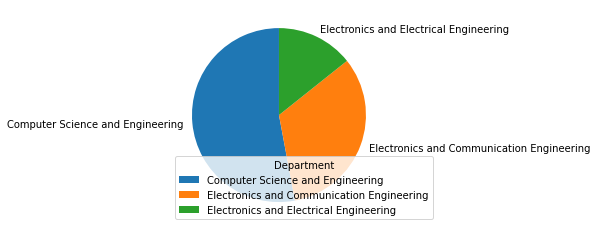

In [120]:
plt.pie(values, labels=label, startangle=90)
plt.legend(title='Department')
plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [121]:
df.fillna(0)
df.replace(np.nan, 0)
df['total'] = df.python + df.mysql + df.python_en + df.computational_thinking
column = df.groupby(by='Department')['total'].nlargest(1).reset_index(level=1, drop=True).index.values
values = df.groupby(by='Department')['total'].nlargest(1).values
print(values)

[ 6124.  9922. 13109.]


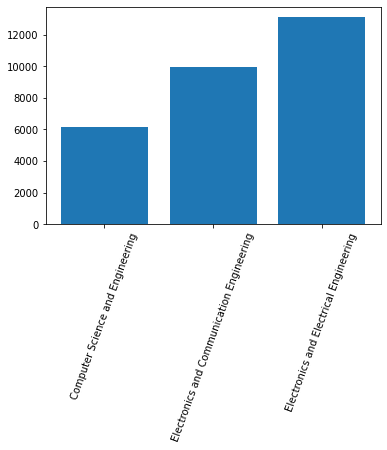

In [122]:
plt.bar(column, values)
plt.xticks(rotation=70)
plt.show()